### Mathematical Models III: ARMA-Process
By combining autoregressive and moving average models we arrive at ARMA(p,q)-processes. They are formally defined as

$$
\Phi(B) X_n =  \Theta(B) W_n
$$

where $\Phi$ and $\Theta$ are the characteristic polynomials of the autoregressive and moving average model respectively and $B$ is the *backshift operator*, i.e.
$$
B(X_n) = X_{n-1}
$$

In particular, we have
$$
\Phi(B) X_n = X_n - a_1 X_{n-1} - \dots - a_{p} X_{n-p}
$$

and
$$
\Theta(B) W_n = W_n - b_1 W_{n-1} - \dots - b_{q} X_{n-q}
$$

In the following, we will generate an AR(2,2) process. We define the ARMA(2,2) process as

We define the ARMA(2,2) process as
$$
X_n = 1.5 X_{n-1} - 0.9 X_{n-2} + W_n + 1.5 W_{n-1} + 2.2 W_{n-2} 
$$

or

$$
(1 - 1.5 B + 0.9 B^2) X_n = (1 + 1.5 B + 2.2 B^2) W_n.
$$


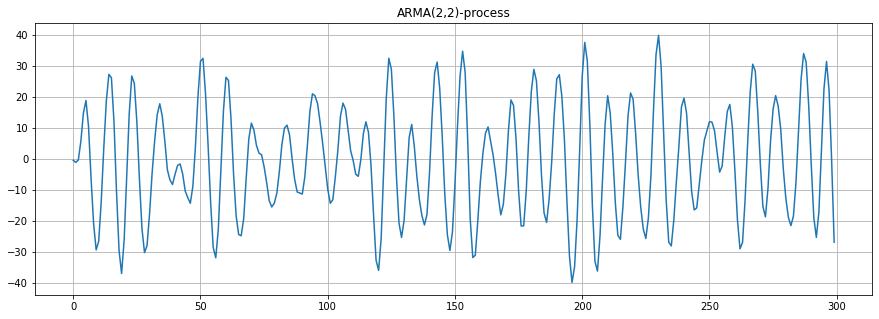

In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

ar2 = [1, -1.5, 0.9]
ma2 = [1, 1.5, 2.2]
model = ArmaProcess(ar = ar2, ma = ma2)
simulated_data = model.generate_sample(nsample=300)

plt.figure(figsize = (15,5))
plt.plot(simulated_data, '-')
plt.title("ARMA(2,2)-process")
plt.grid()
plt.show()

We can check the stationarity and causality of the model as with the pure AR(p) and MA(q) processes, i.w. via the roots of the repsective characteristic polynomials.

In [3]:
import numpy as np

print(model.isstationary)
print(np.abs(model.arroots))

True
[1.05409255 1.05409255]


In [8]:
import numpy as np

print(model.isinvertible)
print(np.abs(model.maroots))

False
[0.67419986 0.67419986]


The acf and pacf for an ARMA(p,q) model do not have any distinct cut-off behaviour that aids for model selection. We demonstrate this with the simulated data. 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


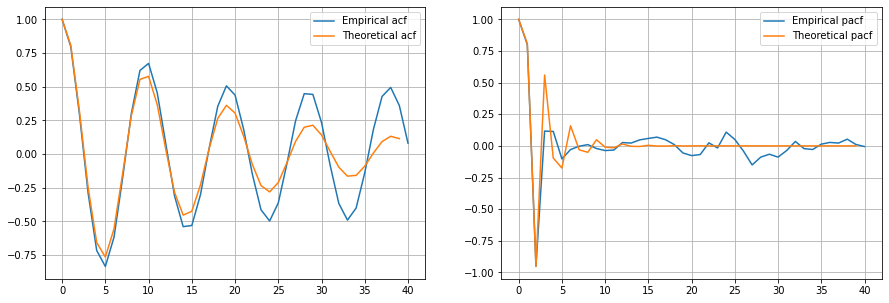

In [5]:
from statsmodels.tsa.stattools import acf, pacf

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(acf(simulated_data, nlags=40), label = "Empirical acf")
ax[0].plot(model.acf(lags=40), label = "Theoretical acf")
ax[0].legend()
ax[0].grid()

ax[1].plot(pacf(simulated_data, nlags=40), label = "Empirical pacf")
ax[1].plot(model.pacf(lags=40), label = "Theoretical pacf")
ax[1].legend()
ax[1].grid()